In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import math
import matplotlib.pyplot as plt

from datetime import date, datetime
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Carregando a base

## Carregando ocorrências de 2010 até 2015

In [2]:
df_ocorrencias_2010_original = pd.read_csv('./dataset/por_ocorrencias/datatran2010.csv', header=0, sep=';', encoding='latin-1')
df_ocorrencias_2011_original = pd.read_csv('./dataset/por_ocorrencias/datatran2011.csv', header=0, sep=';', encoding='latin-1')
df_ocorrencias_2012_original = pd.read_csv('./dataset/por_ocorrencias/datatran2012.csv', header=0, sep=';', encoding='latin-1')
df_ocorrencias_2013_original = pd.read_csv('./dataset/por_ocorrencias/datatran2013.csv', header=0, sep=';', encoding='latin-1')
df_ocorrencias_2014_original = pd.read_csv('./dataset/por_ocorrencias/datatran2014.csv', header=0, sep=';', encoding='latin-1')
df_ocorrencias_2015_original = pd.read_csv('./dataset/por_ocorrencias/datatran2015.csv', header=0, sep=';', encoding='latin-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_ocorrencias_2010_original['ano'] = np.repeat('2010', df_ocorrencias_2010_original.shape[0])
df_ocorrencias_2011_original['ano'] = np.repeat('2011', df_ocorrencias_2011_original.shape[0])
df_ocorrencias_2012_original['ano'] = np.repeat('2012', df_ocorrencias_2012_original.shape[0])
df_ocorrencias_2013_original['ano'] = np.repeat('2013', df_ocorrencias_2013_original.shape[0])
df_ocorrencias_2014_original['ano'] = np.repeat('2014', df_ocorrencias_2014_original.shape[0])
df_ocorrencias_2015_original['ano'] = np.repeat('2015', df_ocorrencias_2015_original.shape[0])

In [4]:
df_ocorrencias_2015_original.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,83298209,2015-01-01,Quinta,00:05:00,RJ,101,327.0,NITEROI,Outras,Colisão traseira,...,Urbano,2015,2,0,0,0,2,0,0,2
1,83298218,2015-01-01,Quinta,01:20:00,MS,163,434.4,CAMPO GRANDE,Animais na Pista,Saída de Pista,...,Rural,2015,2,0,1,0,1,0,1,1
2,83298220,2015-01-01,Quinta,01:45:00,RJ,40,64.0,PETROPOLIS,Outras,Colisão com objeto fixo,...,Urbano,2015,2,0,0,0,2,0,0,2
3,83298221,2015-01-01,Quinta,02:50:00,SC,101,356.1,SANGAO,Falta de atenção,Saída de Pista,...,Urbano,2015,4,0,4,0,0,0,4,1
4,83298222,2015-01-01,Quinta,02:50:00,RS,101,25.9,TRES CACHOEIRAS,Falta de atenção,Saída de Pista,...,Urbano,2015,1,0,0,0,1,0,0,1


#### Concatenando todas as bases

In [5]:
df_ocorrencias_original = pd.concat([df_ocorrencias_2010_original, 
                                     df_ocorrencias_2011_original, 
                                     df_ocorrencias_2012_original, 
                                     df_ocorrencias_2013_original, 
                                     df_ocorrencias_2014_original, 
                                     df_ocorrencias_2015_original]).reset_index()
df_ocorrencias_original.drop(columns='index', inplace=True)
print(f'Total de Linhas:\t {df_ocorrencias_original.shape[0]}\nTotal de Colunas:\t {df_ocorrencias_original.shape[1]}')

Total de Linhas:	 1038473
Total de Colunas:	 26


#### Listando as colunas da base

In [6]:
df_ocorrencias_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   id                      1038473 non-null  int64 
 1   data_inversa            1038473 non-null  object
 2   dia_semana              1038473 non-null  object
 3   horario                 1038473 non-null  object
 4   uf                      1038473 non-null  object
 5   br                      1038473 non-null  object
 6   km                      1038473 non-null  object
 7   municipio               1038473 non-null  object
 8   causa_acidente          1038473 non-null  object
 9   tipo_acidente           1038473 non-null  object
 10  classificacao_acidente  1038473 non-null  object
 11  fase_dia                1038473 non-null  object
 12  sentido_via             1038473 non-null  object
 13  condicao_metereologica  1038473 non-null  object
 14  tipo_pista        

A coluna 'condicao_metereologica' está com a grafia errada

In [7]:
df_ocorrencias_original.rename(columns = {'condicao_metereologica':'condicao_meteorologica'}, inplace=True)

# Entendimento e Pré-Processamento

## Criando cópia para limpeza

In [8]:
df_ocorrencias_limpo = df_ocorrencias_original.copy()

## Criando tabela para analisar entender quais são os tipos de cada coluna e um exemplo do conteúdo

In [9]:
df_ocorrencias_informativo = pd.DataFrame(df_ocorrencias_original.dtypes).reset_index()
df_ocorrencias_informativo.columns = ['coluna', 'tipo']
df_ocorrencias_informativo['exemplo'] = list(df_ocorrencias_original.iloc[0])
df_ocorrencias_informativo

,coluna,tipo,exemplo
0,id,int64,1000329
1,data_inversa,object,29/10/2010
2,dia_semana,object,Sexta
3,horario,object,14:20:00
4,uf,object,RS
5,br,object,285
6,km,object,397.3
7,municipio,object,SANTA BARBARA DO SUL
8,causa_acidente,object,Velocidade incompatível
9,tipo_acidente,object,Saída de Pista


## Analisando campos nulos

In [10]:
df_qtd_campos_vazios_por_coluna = pd.DataFrame({
    'coluna':[],
    'qtd_vazio':[]
})

for column in df_ocorrencias_original.columns:
    df_aux = pd.DataFrame({
        'coluna': [column],
        'qtd_vazio': [df_ocorrencias_original[column].isnull().sum()]
    })
    df_qtd_campos_vazios_por_coluna = pd.concat([df_qtd_campos_vazios_por_coluna, df_aux])

df_qtd_campos_vazios_por_coluna.reset_index().drop(columns=['index']).head()

,coluna,qtd_vazio
0,id,0.0
1,data_inversa,0.0
2,dia_semana,0.0
3,horario,0.0
4,uf,0.0


Atualizando base informativa

In [11]:
df_ocorrencias_informativo.set_index('coluna').merge(df_qtd_campos_vazios_por_coluna.set_index('coluna'), on='coluna').reset_index()

,coluna,tipo,exemplo,qtd_vazio
0,id,int64,1000329,0.0
1,data_inversa,object,29/10/2010,0.0
2,dia_semana,object,Sexta,0.0
3,horario,object,14:20:00,0.0
4,uf,object,RS,0.0
5,br,object,285,0.0
6,km,object,397.3,0.0
7,municipio,object,SANTA BARBARA DO SUL,0.0
8,causa_acidente,object,Velocidade incompatível,0.0
9,tipo_acidente,object,Saída de Pista,0.0


Aparentemente não existem campos nulos na base.

## Iniciando análise individual por colunas do tipo object

### data_inversa

In [12]:
df_ocorrencias_original[['data_inversa']]

,data_inversa
0,29/10/2010
1,14/12/2010
2,07/03/2010
3,26/10/2010
4,15/09/2010
...,...
1038468,2015-12-05
1038469,2015-11-23
1038470,2015-12-24
1038471,2015-07-13


In [13]:
len(df_ocorrencias_original.data_inversa.unique())

2191

Existem 2191 datas diferentes. Estamos analisando 6 anos (2010 até 2015). Pesquisando no Google, o ano de 2012 teve 366 dias, enquanto os outros 5 tiveram 365.

In [14]:
print(f'(365 * 5) + 366 = {(365 * 5) + 366}')

(365 * 5) + 366 = 2191


Temos registro de ocorrências todos os dias.

Imprimindo a tabela, notamos que as datas do head() possuem o padrão dd/mm/yyyy, enquanto as do tail() possuem o padrão yyyy-mm-dd. Em quais anos cada padrão se aplica?

In [15]:
%%time
import re

# buscando datas no formato dd/mm/yyyy
padrao_data = re.compile("([0-3][0-9])(/)([0-1][0-9])(/)(20[0-9][0-9])")

formato_esperado = []
for idx, row in df_ocorrencias_original.iterrows():
    padrao_encontrado = re.search(padrao_data, row['data_inversa'])
    if padrao_encontrado:
        formato_esperado.append(True)
    else:
        formato_esperado.append(False)

len(formato_esperado)

CPU times: user 1min 6s, sys: 111 ms, total: 1min 7s
Wall time: 1min 7s


1038473

In [16]:
df_analise_data = df_ocorrencias_original[['id', 'data_inversa', 'ano']].copy()
df_analise_data['ddMMyyyy'] = formato_esperado
df_analise_data.head()

,id,data_inversa,ano,ddMMyyyy
0,1000329,29/10/2010,2010,True
1,1000837,14/12/2010,2010,True
2,1002150,07/03/2010,2010,True
3,1003283,26/10/2010,2010,True
4,1004212,15/09/2010,2010,True


In [17]:
df_by_ano_com_padrao_ddMMyyyy = df_analise_data.query('ddMMyyyy == True').groupby('ano').agg({'id':'count'}).reset_index().rename(columns={'id':'dd/MM/yyyy'})
df_by_ano_com_padrao_ddMMyyyy

,ano,dd/MM/yyyy
0,2010,183469
1,2011,192326


In [18]:
%%time
import re

# buscando datas no formato yyyy-dd-mm
padrao_data = re.compile("(20[0-9][0-9])(-)([0-1][0-9])(-)([0-3][0-9])")

formato_esperado = []
for idx, row in df_ocorrencias_original.iterrows():
    padrao_encontrado = re.search(padrao_data, row['data_inversa'])
    if padrao_encontrado:
        formato_esperado.append(True)
    else:
        formato_esperado.append(False)

len(formato_esperado)

CPU times: user 1min 7s, sys: 59.5 ms, total: 1min 7s
Wall time: 1min 7s


1038473

In [19]:
df_analise_data['yyyyMMdd'] = formato_esperado
df_analise_data.head()

,id,data_inversa,ano,ddMMyyyy,yyyyMMdd
0,1000329,29/10/2010,2010,True,False
1,1000837,14/12/2010,2010,True,False
2,1002150,07/03/2010,2010,True,False
3,1003283,26/10/2010,2010,True,False
4,1004212,15/09/2010,2010,True,False


In [20]:
df_by_ano_com_padrao_yyyyMMdd = df_analise_data.query('yyyyMMdd == True').groupby('ano').agg({'id':'count'}).reset_index().rename(columns={'id':'yyyy-MM-dd'})
df_by_ano_com_padrao_yyyyMMdd

,ano,yyyy-MM-dd
0,2012,184568
1,2013,186748
2,2014,169201
3,2015,122161


In [21]:
df_total_registros_por_ano = df_ocorrencias_original.groupby('ano').agg({'id':'count'}).reset_index().rename(columns={'id':'total_registros'})
df_total_registros_por_ano

,ano,total_registros
0,2010,183469
1,2011,192326
2,2012,184568
3,2013,186748
4,2014,169201
5,2015,122161


In [22]:
df_total_registros_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ano              6 non-null      object
 1   total_registros  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [23]:
df_total_registros_por_ano.set_index('ano')\
.merge(df_by_ano_com_padrao_yyyyMMdd.set_index('ano'), on='ano', how='left').reset_index()\
.merge(df_by_ano_com_padrao_ddMMyyyy.set_index('ano'), on='ano', how='left').reset_index()\
.fillna(0)

,index,ano,total_registros,yyyy-MM-dd,dd/MM/yyyy
0,0,2010,183469,0.0,183469.0
1,1,2011,192326,0.0,192326.0
2,2,2012,184568,184568.0,0.0
3,3,2013,186748,186748.0,0.0
4,4,2014,169201,169201.0,0.0
5,5,2015,122161,122161.0,0.0


Os anos de 2010 e 2011 possuem todas as datas no formato **dd/mm/yyyy**, enquanto de 2012 em diante as datas possuem o formato inverso **yyyy-mm-dd**

O ideal é que este campo fosse do tipo data.

In [24]:
%%time
df_aux = df_ocorrencias_limpo.copy()

df_aux['data_inversa'] = [
    pd.to_datetime(row['data_inversa'], format='%d/%m/%Y') if row['ano'] in ['2010', '2011'] else
    pd.to_datetime(row['data_inversa'], format='%Y-%m-%d')
    for _, row in df_aux.iterrows()
]

df_aux[['data_inversa']]

CPU times: user 3min 4s, sys: 500 ms, total: 3min 4s
Wall time: 3min 4s


,data_inversa
0,2010-10-29
1,2010-12-14
2,2010-03-07
3,2010-10-26
4,2010-09-15
...,...
1038468,2015-12-05
1038469,2015-11-23
1038470,2015-12-24
1038471,2015-07-13


In [25]:
df_ocorrencias_limpo['data_inversa'] = df_aux['data_inversa']
df_ocorrencias_limpo.rename(columns={'data_inversa':'data'}, inplace=True)
df_ocorrencias_limpo[['data']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   data    1038473 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 MB


Extraindo o mês para uma nova coluna categorica.

In [26]:
df_aux = df_ocorrencias_limpo[['data']].copy()
df_aux['mes'] = df_aux['data'].dt.month
df_aux.mes.unique()

array([10, 12,  3,  9,  6,  5, 11,  1,  8,  7,  2,  4])

In [27]:
df_aux['mes'] = pd.Categorical(df_aux['mes'])
df_aux['mes'].unique()

[10, 12, 3, 9, 6, ..., 1, 8, 7, 2, 4]
Length: 12
Categories (12, int64): [10, 12, 3, 9, ..., 8, 7, 2, 4]

In [28]:
df_ocorrencias_limpo['mes'] = df_aux['mes']
df_ocorrencias_limpo['mes']

0          10
1          12
2           3
3          10
4           9
           ..
1038468    12
1038469    11
1038470    12
1038471     7
1038472     7
Name: mes, Length: 1038473, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

#### Checkpoint para o campo de data

In [29]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### dia_semana

In [30]:
df_ocorrencias_original['dia_semana'].unique()

array(['Sexta', 'Terça', 'Domingo', 'Quarta', 'Quinta', 'Sábado',
       'Segunda'], dtype=object)

O único tratamento pertinente é a transformação para um campo categórico sem ordem, pois os dias são variáveis categóricas nominais.

In [31]:
df_aux = df_ocorrencias_original[['dia_semana']].copy()
df_aux['dia_semana'] = pd.Categorical(df_aux['dia_semana'])

In [32]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 1 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   dia_semana  1038473 non-null  category
dtypes: category(1)
memory usage: 1014.6 KB


In [33]:
df_ocorrencias_limpo['dia_semana'] = df_aux['dia_semana']
df_ocorrencias_limpo.dia_semana

0            Sexta
1            Terça
2          Domingo
3            Terça
4           Quarta
            ...   
1038468     Sábado
1038469    Segunda
1038470     Quinta
1038471    Segunda
1038472    Segunda
Name: dia_semana, Length: 1038473, dtype: category
Categories (7, object): ['Domingo', 'Quarta', 'Quinta', 'Segunda', 'Sexta', 'Sábado', 'Terça']

#### Checkpoint para o campo de dia_semana

In [34]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### horario

In [35]:
df_ocorrencias_limpo.horario.head()

0    14:20:00
1    22:00:00
2    16:00:00
3    14:20:00
4    12:30:00
Name: horario, dtype: object

In [36]:
lista_horarios = df_ocorrencias_limpo.horario.unique()
len(lista_horarios)

1474

Entendo que a hora seja a informação mais util para análise, podendo descartar os minutos e segundos. Ela pode ser uma variável categorica nominal, pois o peso da informação não aumenta de acordo seu valor numérico.

In [37]:
%%time
lista_horas_completas = df_ocorrencias_limpo.horario

lista_horas = []
for hora_completa in lista_horas_completas:
    lista_horas.append(int(hora_completa.split(sep=':')[0]))

lista_horas[:10]

CPU times: user 358 ms, sys: 0 ns, total: 358 ms
Wall time: 388 ms


[14, 22, 16, 14, 12, 14, 9, 21, 18, 18]

In [38]:
df_ocorrencias_limpo['hora'] = lista_horas
df_ocorrencias_limpo[['horario','hora']].head()

,horario,hora
0,14:20:00,14
1,22:00:00,22
2,16:00:00,16
3,14:20:00,14
4,12:30:00,12


In [39]:
df_ocorrencias_limpo.drop(columns='horario', inplace=True)
df_ocorrencias_limpo

,id,data,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,mes,hora
0,1000329,2010-10-29,Sexta,RS,285,397.3,SANTA BARBARA DO SUL,Velocidade incompatível,Saída de Pista,Sem Vítimas,...,5,0,0,0,5,0,0,1,10,14
1,1000837,2010-12-14,Terça,SP,116,406.5,MIRACATU,Outras,Colisão com objeto fixo,Sem Vítimas,...,1,0,0,0,1,0,0,1,12,22
2,1002150,2010-03-07,Domingo,BA,407,220.8,CAPIM GROSSO,Velocidade incompatível,Capotamento,Com Vítimas Feridas,...,3,0,0,2,1,0,2,1,3,16
3,1003283,2010-10-26,Terça,BA,116,567.0,NOVA ITARANA,Outras,Colisão com objeto fixo,Sem Vítimas,...,1,0,0,0,1,0,0,1,10,14
4,1004212,2010-09-15,Quarta,SE,101,107.0,SAO CRISTOVAO,Falta de atenção,Colisão com objeto fixo,Com Vítimas Feridas,...,2,0,2,0,0,0,2,1,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038468,83480933,2015-12-05,Sábado,SC,101,37.0,JOINVILLE,Falta de atenção,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,3,0,1,0,2,0,1,2,12,16
1038469,83480982,2015-11-23,Segunda,MT,163,512.0,DIAMANTINO,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,...,2,0,0,0,2,0,0,2,11,16
1038470,83481192,2015-12-24,Quinta,DF,80,0.5,BRASILIA,Falta de atenção,Colisão lateral,Com Vítimas Fatais,...,4,1,1,1,0,1,2,2,12,16
1038471,83481253,2015-07-13,Segunda,AL,104,52.9,MURICI,Outras,Saída de Pista,Sem Vítimas,...,2,0,0,0,2,0,0,1,7,14


#### Checkpoint para o campo de horario

In [40]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### uf

In [41]:
df_ocorrencias_limpo[['uf']]

,uf
0,RS
1,SP
2,BA
3,BA
4,SE
...,...
1038468,SC
1038469,MT
1038470,DF
1038471,AL


In [42]:
df_ocorrencias_limpo.uf.unique()

array(['RS', 'SP', 'BA', 'SE', 'PR', 'MG', 'GO', 'PE', 'PA', 'RN', 'SC',
       'RR', 'AL', 'MA', 'RJ', 'MS', 'MT', 'ES', 'CE', 'PI', 'AC', 'RO',
       'PB', 'TO', 'DF', 'AM', 'AP', '(null)'], dtype=object)

In [43]:
len(df_ocorrencias_limpo.uf.unique())

28

O Brasil possui 26 estados e o Distrito Federal. Notamos a existencia de um valor '(null)' em formato String, portanto numa análise ele seria contado como mais uma categoria, e não como uma informação faltante. A coluna também deve ser categorica nominal.

In [44]:
df_aux = df_ocorrencias_limpo[['uf']].copy()
df_aux = df_aux.replace('(null)', None)
df_aux.uf.unique()

array(['RS', 'SP', 'BA', 'SE', 'PR', 'MG', 'GO', 'PE', 'PA', 'RN', 'SC',
       'RR', 'AL', 'MA', 'RJ', 'MS', 'MT', 'ES', 'CE', 'PI', 'AC', 'RO',
       'PB', 'TO', 'DF', 'AM', 'AP'], dtype=object)

In [45]:
df_aux['uf'] = pd.Categorical(df_aux['uf'])
df_aux[['uf']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   uf      1038473 non-null  category
dtypes: category(1)
memory usage: 1015.5 KB


In [46]:
df_ocorrencias_limpo['uf'] = df_aux['uf']
df_ocorrencias_limpo.uf

0          RS
1          SP
2          BA
3          BA
4          SE
           ..
1038468    SC
1038469    MT
1038470    DF
1038471    AL
1038472    RS
Name: uf, Length: 1038473, dtype: category
Categories (27, object): ['AC', 'AL', 'AM', 'AP', ..., 'SC', 'SE', 'SP', 'TO']

#### Checkpoint para o campo de uf

In [47]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### br

**Curiosidade**: O primeiro algarismo indica a categoria da rodovia, enquanto o segundo e o terceiro indicam sua posição e localização. Elas se dividem em cinco categorias: radiais, longitudinais, transversais, diagonais e de ligação.

Rodovias radiais: BR-0 XX- rodovias que partem da capital federal em direção aos extremos do país

Rodovias longitudinais: BR-1 XX- rodovias que cortam o país na direção norte-sul

Rodovias transversais: BR-2 XX- rodovias que cortam o país na direção leste-oeste

Rodovias diagonais: BR-3 XX- rodovias podem apresentar dois modos de orientação: noroeste-sudeste ou nordeste-sudoeste

Rodovias de ligação: BR-4 XX- rodovias apresentam-se em qualquer direção.

Também há rodovias iniciadas com BR-6 XX, porém são poucas e de curta extensão.

In [48]:
df_ocorrencias_limpo[['br']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   br      1038473 non-null  object
dtypes: object(1)
memory usage: 7.9+ MB


In [49]:
df_ocorrencias_limpo[['br']]

,br
0,285
1,116
2,407
3,116
4,101
...,...
1038468,101
1038469,163
1038470,80
1038471,104


In [50]:
df_ocorrencias_limpo.br.unique()

array([285, 116, 407, 101, 280, 381, 251, 369, 40, 232, 60, 316, 226, 174,
       277, 104, 262, 135, 70, 158, 267, 153, 463, 408, 10, 290, 282, 364,
       343, 110, 476, 317, 319, 259, 376, 324, 293, 163, 242, 392, 20,
       424, 230, 393, 480, 465, 365, 470, 222, 50, 386, 452, 354, 428,
       235, 287, 356, 471, 405, 367, 272, 373, 487, 459, 361, 402, 377,
       330, 423, 468, 427, 210, 304, 406, 493, 472, 450, 308, 146, 460,
       467, 414, 447, 410, 495, 156, 80, 469, 488, 418, 401, 474, 416,
       485, 432, 404, 425, 429, 419, 958, 30, 412, 490, 0, 409, 422, 208,
       400, 173, 359, 142, 1, 473, 420, 332, 870, 544, 298, 756, 707, 498,
       155, 421, '282', '280', '116', '364', '101', '319', '262', '40',
       '135', '459', '153', '381', '470', '50', '316', '110', '354',
       '393', '369', '324', '285', '70', '290', '277', '232', '158',
       '267', '242', '304', '392', '293', '386', '163', '104', '10',
       '235', '376', '230', '419', '365', '287', '174', '476', '3

In [51]:
len(df_ocorrencias_limpo.br.unique())

287

Aparentemente existem valores escritos em formato string e un valor '(null)'. Será necessário a padronização dos formatos e que esta variável seja categorica nominal.

In [52]:
df_aux = df_ocorrencias_limpo[['br']].copy()
df_aux = df_aux.replace('(null)', 0)
df_aux['br'].unique()

array([285, 116, 407, 101, 280, 381, 251, 369, 40, 232, 60, 316, 226, 174,
       277, 104, 262, 135, 70, 158, 267, 153, 463, 408, 10, 290, 282, 364,
       343, 110, 476, 317, 319, 259, 376, 324, 293, 163, 242, 392, 20,
       424, 230, 393, 480, 465, 365, 470, 222, 50, 386, 452, 354, 428,
       235, 287, 356, 471, 405, 367, 272, 373, 487, 459, 361, 402, 377,
       330, 423, 468, 427, 210, 304, 406, 493, 472, 450, 308, 146, 460,
       467, 414, 447, 410, 495, 156, 80, 469, 488, 418, 401, 474, 416,
       485, 432, 404, 425, 429, 419, 958, 30, 412, 490, 0, 409, 422, 208,
       400, 173, 359, 142, 1, 473, 420, 332, 870, 544, 298, 756, 707, 498,
       155, 421, '282', '280', '116', '364', '101', '319', '262', '40',
       '135', '459', '153', '381', '470', '50', '316', '110', '354',
       '393', '369', '324', '285', '70', '290', '277', '232', '158',
       '267', '242', '304', '392', '293', '386', '163', '104', '10',
       '235', '376', '230', '419', '365', '287', '174', '476', '3

In [53]:
df_aux['br'] = df_aux.br.astype(int)
df_aux['br'].unique()

array([285, 116, 407, 101, 280, 381, 251, 369,  40, 232,  60, 316, 226,
       174, 277, 104, 262, 135,  70, 158, 267, 153, 463, 408,  10, 290,
       282, 364, 343, 110, 476, 317, 319, 259, 376, 324, 293, 163, 242,
       392,  20, 424, 230, 393, 480, 465, 365, 470, 222,  50, 386, 452,
       354, 428, 235, 287, 356, 471, 405, 367, 272, 373, 487, 459, 361,
       402, 377, 330, 423, 468, 427, 210, 304, 406, 493, 472, 450, 308,
       146, 460, 467, 414, 447, 410, 495, 156,  80, 469, 488, 418, 401,
       474, 416, 485, 432, 404, 425, 429, 419, 958,  30, 412, 490,   0,
       409, 422, 208, 400, 173, 359, 142,   1, 473, 420, 332, 870, 544,
       298, 756, 707, 498, 155, 421, 634, 415, 349,   4, 140,  28, 661,
       462, 352, 617, 580, 221, 560, 654, 241, 499, 501, 489,  84, 687,
       178, 552, 453, 505, 183, 265, 426, 270, 441, 152, 681, 154, 767,
       719, 323, 337, 851, 268,   2, 184, 648, 380, 591, 448,  37, 388,
       884, 250, 931, 436, 433, 211, 417, 186])

In [54]:
df_aux['br'] = pd.Categorical(df_aux['br'])
df_aux.br

0          285
1          116
2          407
3          116
4          101
          ... 
1038468    101
1038469    163
1038470     80
1038471    104
1038472    116
Name: br, Length: 1038473, dtype: category
Categories (177, int64): [0, 1, 2, 4, ..., 870, 884, 931, 958]

In [55]:
df_aux[['br']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   br      1038473 non-null  category
dtypes: category(1)
memory usage: 2.0 MB


Possuímos 4 valores nulos para esta coluna.

In [56]:
df_ocorrencias_limpo['br'] = df_aux['br']
df_ocorrencias_limpo.br

0          285
1          116
2          407
3          116
4          101
          ... 
1038468    101
1038469    163
1038470     80
1038471    104
1038472    116
Name: br, Length: 1038473, dtype: category
Categories (177, int64): [0, 1, 2, 4, ..., 870, 884, 931, 958]

#### Checkpoint para o campo de br

In [57]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### km

In [58]:
df_ocorrencias_limpo[['km']]

,km
0,397.3
1,406.5
2,220.8
3,567.0
4,107.0
...,...
1038468,37.0
1038469,512.0
1038470,0.5
1038471,52.9


In [59]:
df_ocorrencias_limpo[['km']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038473 entries, 0 to 1038472
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   km      1038473 non-null  object
dtypes: object(1)
memory usage: 7.9+ MB


In [60]:
df_ocorrencias_limpo['km'].unique()

array([397.3, 406.5, 220.8, ..., 968.9, 1964.0, 1029.9], dtype=object)

Apesar do campo ser do tipo float e possuir 1 casa decimal, para fins deste projeto apenas o número inteiro é necessário.

In [61]:
df_aux = df_ocorrencias_limpo[['km']].copy()
df_aux = df_aux.replace('(null)', np.NaN)
df_aux['km'] = df_aux.km.astype(float)
df_aux['km'].unique()

array([ 397.3,  406.5,  220.8, ...,  968.9, 1964. , 1029.9])

In [62]:
df_ocorrencias_limpo['km'] = df_aux['km']
df_ocorrencias_limpo['km']

0          397.3
1          406.5
2          220.8
3          567.0
4          107.0
           ...  
1038468     37.0
1038469    512.0
1038470      0.5
1038471     52.9
1038472    266.0
Name: km, Length: 1038473, dtype: float64

#### checkpoint para o campo km

In [63]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### municipio

In [64]:
df_ocorrencias_limpo[['municipio']]

,municipio
0,SANTA BARBARA DO SUL
1,MIRACATU
2,CAPIM GROSSO
3,NOVA ITARANA
4,SAO CRISTOVAO
...,...
1038468,JOINVILLE
1038469,DIAMANTINO
1038470,BRASILIA
1038471,MURICI


Vou iniciar a análise padronizando o __case__ do municipio para tentar garantir que não haja valores duplicados devido a maísculas e minúsculas. Esta variável será transformada em categoriga nominal.

In [65]:
df_aux = df_ocorrencias_limpo[['municipio']].copy()
df_aux['municipio'] = df_aux['municipio'].str.lower()
df_aux

,municipio
0,santa barbara do sul
1,miracatu
2,capim grosso
3,nova itarana
4,sao cristovao
...,...
1038468,joinville
1038469,diamantino
1038470,brasilia
1038471,murici


In [66]:
len(df_aux.municipio.unique())

2058

In [67]:
df_aux['municipio'] = pd.Categorical(df_aux['municipio'])
df_aux.municipio

0          santa barbara do sul
1                      miracatu
2                  capim grosso
3                  nova itarana
4                 sao cristovao
                   ...         
1038468               joinville
1038469              diamantino
1038470                brasilia
1038471                  murici
1038472                  canoas
Name: municipio, Length: 1038473, dtype: category
Categories (2058, object): ['abadia de goias', 'abadiania', 'abare', 'abatia', ..., 'xaxim', 'xexeu', 'xinguara', 'ze doca']

In [68]:
df_ocorrencias_limpo['municipio'] = df_aux['municipio']
df_ocorrencias_limpo['municipio']

0          santa barbara do sul
1                      miracatu
2                  capim grosso
3                  nova itarana
4                 sao cristovao
                   ...         
1038468               joinville
1038469              diamantino
1038470                brasilia
1038471                  murici
1038472                  canoas
Name: municipio, Length: 1038473, dtype: category
Categories (2058, object): ['abadia de goias', 'abadiania', 'abare', 'abatia', ..., 'xaxim', 'xexeu', 'xinguara', 'ze doca']

#### checkpoint para o campo municipio

In [69]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### causa_acidente

In [70]:
df_ocorrencias_limpo['causa_acidente'].unique()

array(['Velocidade incompatível', 'Outras', 'Falta de atenção',
       'Animais na Pista', 'Ingestão de álcool',
       'Desobediência à sinalização', 'Defeito mecânico em veículo',
       'Ultrapassagem indevida', 'Não guardar distância de segurança',
       'Dormindo', 'Defeito na via', '(null)'], dtype=object)

Esta variável precisa ser categorica nominal e o valor '(null)' pode ser substituido por 'nao informado'

In [71]:
df_aux = df_ocorrencias_limpo[['causa_acidente']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.causa_acidente.unique()

array(['Velocidade incompatível', 'Outras', 'Falta de atenção',
       'Animais na Pista', 'Ingestão de álcool',
       'Desobediência à sinalização', 'Defeito mecânico em veículo',
       'Ultrapassagem indevida', 'Não guardar distância de segurança',
       'Dormindo', 'Defeito na via', 'Não Informado'], dtype=object)

In [72]:
df_aux['causa_acidente'] = pd.Categorical(df_aux['causa_acidente'])
df_ocorrencias_limpo['causa_acidente'] = df_aux['causa_acidente']
df_ocorrencias_limpo['causa_acidente'].unique()

['Velocidade incompatível', 'Outras', 'Falta de atenção', 'Animais na Pista', 'Ingestão de álcool', ..., 'Ultrapassagem indevida', 'Não guardar distância de segurança', 'Dormindo', 'Defeito na via', 'Não Informado']
Length: 12
Categories (12, object): ['Velocidade incompatível', 'Outras', 'Falta de atenção', 'Animais na Pista', ..., 'Não guardar distância de segurança', 'Dormindo', 'Defeito na via', 'Não Informado']

#### Checkpoint para o campo causa_acidente

In [73]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### tipo_acidente

In [74]:
df_ocorrencias_limpo['tipo_acidente'].unique()

array(['Saída de Pista', 'Colisão com objeto fixo', 'Capotamento',
       'Atropelamento de animal', 'Colisão traseira',
       'Colisão com bicicleta', 'Atropelamento de pessoa',
       'Colisão Transversal', 'Colisão lateral', 'Colisão frontal',
       'Queda de motocicleta / bicicleta / veículo', 'Danos Eventuais',
       'Tombamento', 'Derramamento de Carga', 'Colisão com objeto móvel',
       'Incêndio'], dtype=object)

Não há observações '(null)', sendo somente necessário a conversão para categorica nominal

In [75]:
df_aux = df_ocorrencias_limpo[['tipo_acidente']].copy()
df_aux['tipo_acidente'] = pd.Categorical(df_aux['tipo_acidente'])
df_aux.tipo_acidente.unique()

['Saída de Pista', 'Colisão com objeto fixo', 'Capotamento', 'Atropelamento de animal', 'Colisão traseira', ..., 'Danos Eventuais', 'Tombamento', 'Derramamento de Carga', 'Colisão com objeto móvel', 'Incêndio']
Length: 16
Categories (16, object): ['Saída de Pista', 'Colisão com objeto fixo', 'Capotamento', 'Atropelamento de animal', ..., 'Tombamento', 'Derramamento de Carga', 'Colisão com objeto móvel', 'Incêndio']

In [76]:
df_ocorrencias_limpo['tipo_acidente'] = df_aux['tipo_acidente']
df_ocorrencias_limpo['tipo_acidente'].unique()

['Saída de Pista', 'Colisão com objeto fixo', 'Capotamento', 'Atropelamento de animal', 'Colisão traseira', ..., 'Danos Eventuais', 'Tombamento', 'Derramamento de Carga', 'Colisão com objeto móvel', 'Incêndio']
Length: 16
Categories (16, object): ['Saída de Pista', 'Colisão com objeto fixo', 'Capotamento', 'Atropelamento de animal', ..., 'Tombamento', 'Derramamento de Carga', 'Colisão com objeto móvel', 'Incêndio']

#### Checkpoint para o campo tipo_acidente

In [77]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### classificacao_acidente

In [78]:
df_ocorrencias_limpo['classificacao_acidente'].unique()

array(['Sem Vítimas', 'Com Vítimas Feridas', 'Ignorado',
       'Com Vítimas Fatais', '(null)'], dtype=object)

Conversão para categorico e renomeação do null

In [79]:
df_aux = df_ocorrencias_limpo[['classificacao_acidente']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.classificacao_acidente.unique()

array(['Sem Vítimas', 'Com Vítimas Feridas', 'Ignorado',
       'Com Vítimas Fatais', 'Não Informado'], dtype=object)

In [80]:
df_aux['classificacao_acidente'] = pd.Categorical(df_aux.classificacao_acidente) 
df_aux.classificacao_acidente.unique()

['Sem Vítimas', 'Com Vítimas Feridas', 'Ignorado', 'Com Vítimas Fatais', 'Não Informado']
Categories (5, object): ['Sem Vítimas', 'Com Vítimas Feridas', 'Ignorado', 'Com Vítimas Fatais', 'Não Informado']

In [81]:
df_ocorrencias_limpo['classificacao_acidente'] = df_aux['classificacao_acidente']
df_ocorrencias_limpo['classificacao_acidente']

0                  Sem Vítimas
1                  Sem Vítimas
2          Com Vítimas Feridas
3                  Sem Vítimas
4          Com Vítimas Feridas
                  ...         
1038468    Com Vítimas Feridas
1038469            Sem Vítimas
1038470     Com Vítimas Fatais
1038471            Sem Vítimas
1038472            Sem Vítimas
Name: classificacao_acidente, Length: 1038473, dtype: category
Categories (5, object): ['Com Vítimas Fatais', 'Com Vítimas Feridas', 'Ignorado', 'Não Informado', 'Sem Vítimas']

#### Checkpoint para o campo classificacao_acidente

In [82]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### fase_dia

In [83]:
df_ocorrencias_limpo['fase_dia'].unique()

array(['Pleno dia', 'Plena noite', 'Anoitecer', 'Amanhecer', '(null)'],
      dtype=object)

Conversão para categorico e renomeação do null

In [84]:
df_aux = df_ocorrencias_limpo[['fase_dia']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.fase_dia.unique()

array(['Pleno dia', 'Plena noite', 'Anoitecer', 'Amanhecer',
       'Não Informado'], dtype=object)

In [85]:
df_aux['fase_dia'] = pd.Categorical(df_aux.fase_dia) 
df_aux.fase_dia.unique()

['Pleno dia', 'Plena noite', 'Anoitecer', 'Amanhecer', 'Não Informado']
Categories (5, object): ['Pleno dia', 'Plena noite', 'Anoitecer', 'Amanhecer', 'Não Informado']

In [86]:
df_ocorrencias_limpo['fase_dia'] = df_aux['fase_dia']
df_ocorrencias_limpo['fase_dia']

0            Pleno dia
1          Plena noite
2            Pleno dia
3            Pleno dia
4            Pleno dia
              ...     
1038468      Pleno dia
1038469      Pleno dia
1038470      Pleno dia
1038471      Pleno dia
1038472    Plena noite
Name: fase_dia, Length: 1038473, dtype: category
Categories (5, object): ['Amanhecer', 'Anoitecer', 'Não Informado', 'Plena noite', 'Pleno dia']

#### Checkpoint para o campo fase_dia

In [87]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### sentido_via

In [88]:
df_ocorrencias_limpo['sentido_via'].unique()

array(['Crescente', 'Decrescente'], dtype=object)

Somente transformação em categorica

In [89]:
df_aux = df_ocorrencias_limpo[['sentido_via']].copy()
df_aux['sentido_via'] = pd.Categorical(df_aux['sentido_via'])
df_aux.sentido_via.unique()

['Crescente', 'Decrescente']
Categories (2, object): ['Crescente', 'Decrescente']

In [90]:
df_ocorrencias_limpo['sentido_via'] = df_aux['sentido_via']
df_ocorrencias_limpo['sentido_via']

0            Crescente
1            Crescente
2          Decrescente
3            Crescente
4          Decrescente
              ...     
1038468    Decrescente
1038469    Decrescente
1038470    Decrescente
1038471      Crescente
1038472    Decrescente
Name: sentido_via, Length: 1038473, dtype: category
Categories (2, object): ['Crescente', 'Decrescente']

#### Checkpoint para o campo sentido_via

In [91]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### condicao_meteorologica

In [92]:
df_ocorrencias_limpo['condicao_meteorologica'].unique()

array(['Chuva', 'Ceu Claro', 'Sol', 'Nublado', 'Nevoeiro/neblina',
       'Ignorada', 'Vento', 'Granizo', '(null)', 'Neve'], dtype=object)

Conversão para categorico e renomeação do null

In [93]:
df_aux = df_ocorrencias_limpo[['condicao_meteorologica']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.condicao_meteorologica.unique()

array(['Chuva', 'Ceu Claro', 'Sol', 'Nublado', 'Nevoeiro/neblina',
       'Ignorada', 'Vento', 'Granizo', 'Não Informado', 'Neve'],
      dtype=object)

In [94]:
df_aux['condicao_meteorologica'] = pd.Categorical(df_aux.condicao_meteorologica) 
df_aux.condicao_meteorologica.unique()

['Chuva', 'Ceu Claro', 'Sol', 'Nublado', 'Nevoeiro/neblina', 'Ignorada', 'Vento', 'Granizo', 'Não Informado', 'Neve']
Categories (10, object): ['Chuva', 'Ceu Claro', 'Sol', 'Nublado', ..., 'Vento', 'Granizo', 'Não Informado', 'Neve']

In [95]:
df_ocorrencias_limpo['condicao_meteorologica'] = df_aux['condicao_meteorologica']
df_ocorrencias_limpo['condicao_meteorologica']

0              Chuva
1              Chuva
2              Chuva
3          Ceu Claro
4          Ceu Claro
             ...    
1038468          Sol
1038469        Chuva
1038470    Ceu Claro
1038471      Nublado
1038472     Ignorada
Name: condicao_meteorologica, Length: 1038473, dtype: category
Categories (10, object): ['Ceu Claro', 'Chuva', 'Granizo', 'Ignorada', ..., 'Nublado', 'Não Informado', 'Sol', 'Vento']

#### Checkpoint para o campo condicao_meteorologica

In [96]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### tipo_pista

In [97]:
df_ocorrencias_limpo['tipo_pista'].unique()

array(['Simples', 'Dupla', 'Múltipla', '(null)'], dtype=object)

Conversão para categorico e renomeação do null


In [98]:
df_aux = df_ocorrencias_limpo[['tipo_pista']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.tipo_pista.unique()

array(['Simples', 'Dupla', 'Múltipla', 'Não Informado'], dtype=object)

In [99]:
df_aux['tipo_pista'] = pd.Categorical(df_aux.tipo_pista) 
df_aux.tipo_pista.unique()

['Simples', 'Dupla', 'Múltipla', 'Não Informado']
Categories (4, object): ['Simples', 'Dupla', 'Múltipla', 'Não Informado']

In [100]:
df_ocorrencias_limpo['tipo_pista'] = df_aux['tipo_pista']
df_ocorrencias_limpo['tipo_pista']

0           Simples
1             Dupla
2           Simples
3          Múltipla
4           Simples
             ...   
1038468       Dupla
1038469     Simples
1038470     Simples
1038471     Simples
1038472       Dupla
Name: tipo_pista, Length: 1038473, dtype: category
Categories (4, object): ['Dupla', 'Múltipla', 'Não Informado', 'Simples']

#### Checkpoint para o campo tipo_pista

In [101]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### tracado_via

In [102]:
df_ocorrencias_limpo['tracado_via'].unique()

array(['Curva', 'Reta', 'Cruzamento', '(null)'], dtype=object)

Conversão para categorico e renomeação do null

In [103]:
df_aux = df_ocorrencias_limpo[['tracado_via']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.tracado_via.unique()

array(['Curva', 'Reta', 'Cruzamento', 'Não Informado'], dtype=object)

In [104]:
df_aux['tracado_via'] = pd.Categorical(df_aux.tracado_via) 
df_aux.tracado_via.unique()

['Curva', 'Reta', 'Cruzamento', 'Não Informado']
Categories (4, object): ['Curva', 'Reta', 'Cruzamento', 'Não Informado']

In [105]:
df_ocorrencias_limpo['tracado_via'] = df_aux['tracado_via']
df_ocorrencias_limpo['tracado_via']

0          Curva
1           Reta
2           Reta
3           Reta
4           Reta
           ...  
1038468     Reta
1038469     Reta
1038470     Reta
1038471    Curva
1038472     Reta
Name: tracado_via, Length: 1038473, dtype: category
Categories (4, object): ['Cruzamento', 'Curva', 'Não Informado', 'Reta']

#### Checkpoint para o campo tracado_via

In [106]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### uso_solo

In [107]:
df_ocorrencias_limpo['uso_solo'].unique()

array(['Rural', 'Urbano', '(null)'], dtype=object)

Conversão para categorico e renomeação do null

In [108]:
df_aux = df_ocorrencias_limpo[['uso_solo']].copy()
df_aux = df_aux.replace('(null)', 'Não Informado')
df_aux.uso_solo.unique()

array(['Rural', 'Urbano', 'Não Informado'], dtype=object)

In [109]:
df_aux['uso_solo'] = pd.Categorical(df_aux.uso_solo) 
df_aux.uso_solo.unique()

['Rural', 'Urbano', 'Não Informado']
Categories (3, object): ['Rural', 'Urbano', 'Não Informado']

In [110]:
df_ocorrencias_limpo['uso_solo'] = df_aux['uso_solo']
df_ocorrencias_limpo['uso_solo']

0           Rural
1           Rural
2           Rural
3           Rural
4           Rural
            ...  
1038468    Urbano
1038469     Rural
1038470     Rural
1038471     Rural
1038472    Urbano
Name: uso_solo, Length: 1038473, dtype: category
Categories (3, object): ['Não Informado', 'Rural', 'Urbano']

#### Checkpoint para o campo uso_solo

In [111]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

### ano

In [112]:
df_ocorrencias_limpo['ano'].unique()

array(['2010', '2011', '2012', '2013', '2014', '2015'], dtype=object)

Deveria ter criada como categórica no início

In [113]:
df_aux = df_ocorrencias_limpo[['ano']].copy()
df_aux['ano'] = pd.Categorical(df_aux.ano) 
df_aux.ano.unique()

['2010', '2011', '2012', '2013', '2014', '2015']
Categories (6, object): ['2010', '2011', '2012', '2013', '2014', '2015']

In [114]:
df_ocorrencias_limpo['ano'] = df_aux['ano']
df_ocorrencias_limpo['ano']

0          2010
1          2010
2          2010
3          2010
4          2010
           ... 
1038468    2015
1038469    2015
1038470    2015
1038471    2015
1038472    2015
Name: ano, Length: 1038473, dtype: category
Categories (6, object): ['2010', '2011', '2012', '2013', '2014', '2015']

#### Checkpoint para o campo ano

In [115]:
df_ocorrencias_limpo_bkp = df_ocorrencias_limpo.copy()

## Checando os tipos atualizados

In [116]:
df_ocorrencias_informativo = pd.DataFrame(df_ocorrencias_limpo.dtypes).reset_index()
df_ocorrencias_informativo.columns = ['coluna', 'tipo']
df_ocorrencias_informativo['exemplo'] = list(df_ocorrencias_limpo.iloc[0])
df_ocorrencias_informativo

,coluna,tipo,exemplo
0,id,int64,1000329
1,data,datetime64[ns],2010-10-29 00:00:00
2,dia_semana,category,Sexta
3,uf,category,RS
4,br,category,285
5,km,float64,397.3
6,municipio,category,santa barbara do sul
7,causa_acidente,category,Velocidade incompatível
8,tipo_acidente,category,Saída de Pista
9,classificacao_acidente,category,Sem Vítimas


## Reorganizando Colunas

In [117]:
df_ocorrencias_limpo.columns

Index(['id', 'data', 'dia_semana', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_meteorologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'ano', 'pessoas', 'mortos', 'feridos_leves',
       'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'mes',
       'hora'],
      dtype='object')

In [118]:
nova_ordem = [
    'id',
    'ano',
    'mes',
    'data',
    'hora',
    'dia_semana',
    'uf',
    'municipio',
    'br',
    'km',
    'condicao_meteorologica',
    'fase_dia',
    'sentido_via',
    'tipo_pista',
    'tracado_via',
    'uso_solo',
    'tipo_acidente',
    'causa_acidente',
    'classificacao_acidente',
    'veiculos',
    'pessoas',
    'ilesos',
    'feridos',
    'feridos_leves',
    'feridos_graves',
    'mortos',
    'ignorados'
]

In [119]:
df_ocorrencias_limpo = df_ocorrencias_limpo[nova_ordem]
df_ocorrencias_limpo.columns

Index(['id', 'ano', 'mes', 'data', 'hora', 'dia_semana', 'uf', 'municipio',
       'br', 'km', 'condicao_meteorologica', 'fase_dia', 'sentido_via',
       'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_acidente',
       'causa_acidente', 'classificacao_acidente', 'veiculos', 'pessoas',
       'ilesos', 'feridos', 'feridos_leves', 'feridos_graves', 'mortos',
       'ignorados'],
      dtype='object')

In [120]:
df_ocorrencias_limpo.head()

,id,ano,mes,data,hora,dia_semana,uf,municipio,br,km,...,causa_acidente,classificacao_acidente,veiculos,pessoas,ilesos,feridos,feridos_leves,feridos_graves,mortos,ignorados
0,1000329,2010,10,2010-10-29,14,Sexta,RS,santa barbara do sul,285,397.3,...,Velocidade incompatível,Sem Vítimas,1,5,5,0,0,0,0,0
1,1000837,2010,12,2010-12-14,22,Terça,SP,miracatu,116,406.5,...,Outras,Sem Vítimas,1,1,1,0,0,0,0,0
2,1002150,2010,3,2010-03-07,16,Domingo,BA,capim grosso,407,220.8,...,Velocidade incompatível,Com Vítimas Feridas,1,3,1,2,0,2,0,0
3,1003283,2010,10,2010-10-26,14,Terça,BA,nova itarana,116,567.0,...,Outras,Sem Vítimas,1,1,1,0,0,0,0,0
4,1004212,2010,9,2010-09-15,12,Quarta,SE,sao cristovao,101,107.0,...,Falta de atenção,Com Vítimas Feridas,1,2,0,2,2,0,0,0


# Análise Exploratória

## 1. Qual tipo de acidente teve o maior número de óbitos?

In [121]:
df_by_tipo_sum_mortos = df_ocorrencias_limpo.groupby('tipo_acidente')['mortos'].agg('sum').reset_index().sort_values(by='mortos', ascending=False)
df_by_tipo_sum_mortos.rename(columns={'tipo_acidente':'tipo', 'mortos':'total_mortos'}, inplace=True)
df_by_tipo_sum_mortos

,tipo,total_mortos
7,Colisão frontal,15572
1,Atropelamento de pessoa,7968
14,Saída de Pista,5185
3,Colisão Transversal,4526
9,Colisão traseira,4013
8,Colisão lateral,3525
2,Capotamento,2339
4,Colisão com bicicleta,1613
5,Colisão com objeto fixo,1450
13,Queda de motocicleta / bicicleta / veículo,1399


## 2. Qual a taxa de letalidade de cada tipo de acidente com morte?

In [122]:
%%time
df_com_morte_ex = df_ocorrencias_limpo.copy()[['id',
                                                    'causa_acidente', 
                                                    'tipo_acidente',
                                                    'pessoas', 
                                                    'mortos']]
list_pct_mortalidade = []

for _, row in df_com_morte_ex.iterrows():
        list_pct_mortalidade.append(round((row['mortos'] / row['pessoas']) * 100, 2))

df_com_morte_ex['pct_mortalidade'] = list_pct_mortalidade
df_com_morte_ex


CPU times: user 1min 9s, sys: 99.5 ms, total: 1min 9s
Wall time: 1min 9s


,id,causa_acidente,tipo_acidente,pessoas,mortos,pct_mortalidade
0,1000329,Velocidade incompatível,Saída de Pista,5,0,0.0
1,1000837,Outras,Colisão com objeto fixo,1,0,0.0
2,1002150,Velocidade incompatível,Capotamento,3,0,0.0
3,1003283,Outras,Colisão com objeto fixo,1,0,0.0
4,1004212,Falta de atenção,Colisão com objeto fixo,2,0,0.0
...,...,...,...,...,...,...
1038468,83480933,Falta de atenção,Queda de motocicleta / bicicleta / veículo,3,0,0.0
1038469,83480982,Não guardar distância de segurança,Colisão traseira,2,0,0.0
1038470,83481192,Falta de atenção,Colisão lateral,4,1,25.0
1038471,83481253,Outras,Saída de Pista,2,0,0.0


In [123]:
df_com_morte_ex.groupby('tipo_acidente')[['tipo_acidente', 'pct_mortalidade', 'pessoas', 'mortos']]\
                .agg({'pct_mortalidade':'mean', 'pessoas':'sum', 'mortos':'sum'})\
                .round(1)\
                .reset_index()\
                .sort_values(by='pct_mortalidade', ascending=False)

,tipo_acidente,pct_mortalidade,pessoas,mortos
1,Atropelamento de pessoa,13.2,61386,7968
7,Colisão frontal,11.6,130438,15572
4,Colisão com bicicleta,7.2,22636,1613
13,Queda de motocicleta / bicicleta / veículo,2.9,49445,1399
2,Capotamento,2.5,83865,2339
14,Saída de Pista,1.9,233654,5185
15,Tombamento,1.6,56831,1055
5,Colisão com objeto fixo,1.5,84706,1450
0,Atropelamento de animal,1.4,33202,531
3,Colisão Transversal,1.4,265028,4526


## 3. Como está distribuído a quantidade de acidentes por condição metereologica?

In [124]:
df_by_clima = df_ocorrencias_limpo\
                .groupby('condicao_meteorologica')[['id']]\
                .agg({'id':'count'})\
                .reset_index()\
                .rename(columns={'id':'total'})\
                .sort_values(by='total', ascending=False)

df_by_clima

,condicao_meteorologica,total
0,Ceu Claro,506817
6,Nublado,187230
1,Chuva,174254
8,Sol,138395
3,Ignorada,18194
5,Nevoeiro/neblina,10223
9,Vento,3079
2,Granizo,185
4,Neve,70
7,Não Informado,26


## 4. Quais são as maiores causas de acidente?

In [125]:
df_by_causa = df_ocorrencias_limpo\
                .groupby('causa_acidente')[['id']]\
                .agg({'id':'count'})\
                .reset_index()\
                .rename(columns={'id':'total'})\
                .sort_values(by='total', ascending=False)
df_by_causa

,causa_acidente,total
5,Falta de atenção,340358
9,Outras,275067
8,Não guardar distância de segurança,104264
11,Velocidade incompatível,97344
3,Desobediência à sinalização,45029
6,Ingestão de álcool,43622
1,Defeito mecânico em veículo,40533
4,Dormindo,27119
0,Animais na Pista,26230
10,Ultrapassagem indevida,24030


## 5. Qual a condição meteorológica mais letal?

In [126]:
df_mortes_by_meteorologia = df_ocorrencias_limpo\
                                .groupby('condicao_meteorologica')[['id', 'pessoas', 'mortos']]\
                                .agg({'id':'count', 'mortos':'sum', 'pessoas':'sum'})\
                                .reset_index()\
                                .rename(columns={'id':'total'})\
                                .sort_values(by='total', ascending=False)

list_pct_mortalidade = []

for _, row in df_mortes_by_meteorologia.iterrows():
        list_pct_mortalidade.append(round((row['mortos'] / row['pessoas']) * 100, 2))

df_mortes_by_meteorologia['pct_mortalidade'] = list_pct_mortalidade
df_mortes_by_meteorologia.sort_values(by='pct_mortalidade', ascending=False)

,condicao_meteorologica,total,mortos,pessoas,pct_mortalidade
4,Neve,70,8,172,4.65
3,Ignorada,18194,1541,38716,3.98
9,Vento,3079,242,6473,3.74
5,Nevoeiro/neblina,10223,778,22062,3.53
7,Não Informado,26,2,62,3.23
0,Ceu Claro,506817,27141,1117237,2.43
6,Nublado,187230,8648,401539,2.15
2,Granizo,185,7,364,1.92
1,Chuva,174254,6667,350041,1.90
8,Sol,138395,4454,311301,1.43


## 6. Como estão distribuídas as ocorrências ao longo dos anos?

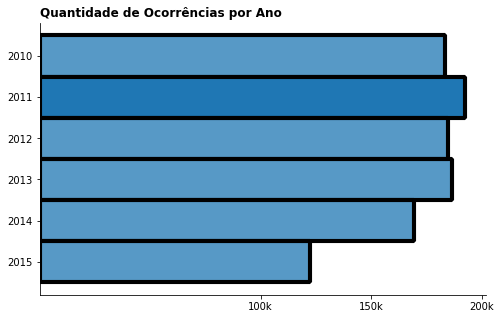

In [127]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_ocorrencias_limpo, y='ano', ax=ax)


alias_tags_xticks = ['100k', '150k', '200k']
tags_xticks = [100000, 150000, 200000]
ax.set_xticks(tags_xticks)
ax.set_xticklabels(alias_tags_xticks)

ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Quantidade de Ocorrências por Ano', 
          fontdict={'fontsize': 12,
                    'fontweight': 'bold',
                    'verticalalignment': 'baseline'
                   },
          loc='left')

# Removendo bordas
sns.despine()

# Alterando cor da barra das informações 
ax.patches[1].set_facecolor('tab:blue')

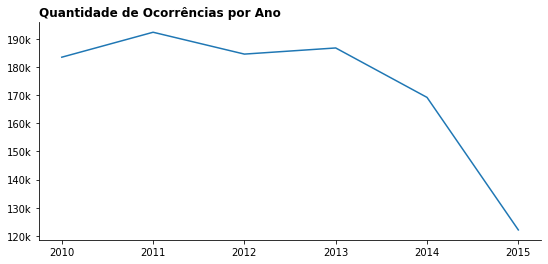

In [128]:
df_ano_total_ocorrencia = df_ocorrencias_limpo.groupby('ano').agg({'id':'count'}).reset_index().rename(columns={'id':'total_ocorrencias'})
fig_dims = (9,4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data=df_ano_total_ocorrencia, x="ano", y="total_ocorrencias")

plt.title('Quantidade de Ocorrências por Ano', 
          fontdict={'fontsize': 12,
                    'fontweight': 'bold',
                    'verticalalignment': 'baseline'
                   },
          loc='left')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticks(list(np.arange(120000, 200000, 10000)))
ax.set_yticklabels([qtd + "k" for qtd in list(map(str, np.arange(120, 200, 10)))])

sns.despine()

## 7. Em qual tipo de solo há mais ocorrências?

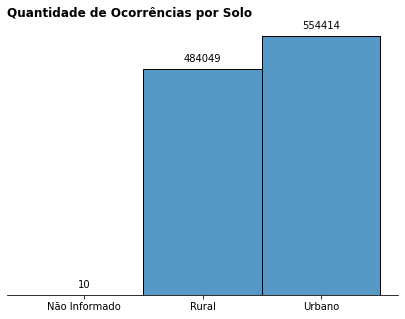

In [129]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_ocorrencias_limpo, x='uso_solo', ax=ax)
plt.title('Quantidade de Ocorrências por Solo', 
          fontdict={'fontsize': 12,
                    'fontweight': 'bold',
                    'verticalalignment': 'baseline'
                   },
          loc='left')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticks([])

for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(), decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Removendo bordas
sns.despine(left=True)

## 8. Como as ocorrências estão distribuídas durante os meses?

In [130]:
df_aux = df_ocorrencias_limpo[['id', 'mes']].copy()
alias_nome_mes = {
	1 :'Janeiro',
	2 :'Fevereiro',
	3 :'Março',
	4 :'Abril',
	5 :'Maio',
	6 :'Junho',
	7 :'Julho',
	8 :'Agosto',
	9 :'Setembro',
	10 :'Outubro',
	11 :'Novembro',
	12 :'Dezembro'
}
df_aux.mes.replace(alias_nome_mes, inplace=True)
df_aux.mes[0]
df_aux['mes'] = pd.Categorical(df_aux['mes'],['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], ordered=True)
df_aux['mes']

0           Outubro
1          Dezembro
2             Março
3           Outubro
4          Setembro
             ...   
1038468    Dezembro
1038469    Novembro
1038470    Dezembro
1038471       Julho
1038472       Julho
Name: mes, Length: 1038473, dtype: category
Categories (12, object): ['Janeiro' < 'Fevereiro' < 'Março' < 'Abril' ... 'Setembro' < 'Outubro' < 'Novembro' < 'Dezembro']

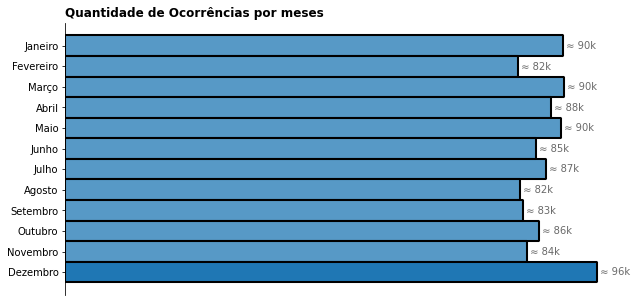

In [131]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_aux, y='mes', ax=ax)

for i in ax.patches:
    ax.text(i.get_width()-1, i.get_y()+.65, \
            ' ≈ ' + f"{int(math.ceil(i.get_width() / 1000.0))}k", fontsize=10,
            color='dimgrey')


ax.set_xticks([])

ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Quantidade de Ocorrências por meses', 
          fontdict={'fontsize': 12,
                    'fontweight': 'bold',
                    'verticalalignment': 'baseline'
                   },
          loc='left')

# Removendo bordas
sns.despine(bottom=True)

# Alterando cor da barra das informações 
ax.patches[11].set_facecolor('tab:blue')

## 9. Qual o município com maior número de ocorrências?

In [132]:
df_by_municipio = df_ocorrencias_limpo\
                    .groupby('municipio')[['id']]\
                    .agg({'id':'count'})\
                    .reset_index()\
                    .rename(columns={'id':'total'})\
                    .sort_values(by='total', ascending=False)

df_by_municipio.head(n=3)


,municipio,total
568,curitiba,14079
1742,sao jose,12051
602,duque de caxias,11571


## 10. Qual é o estado com mais ocorrências?

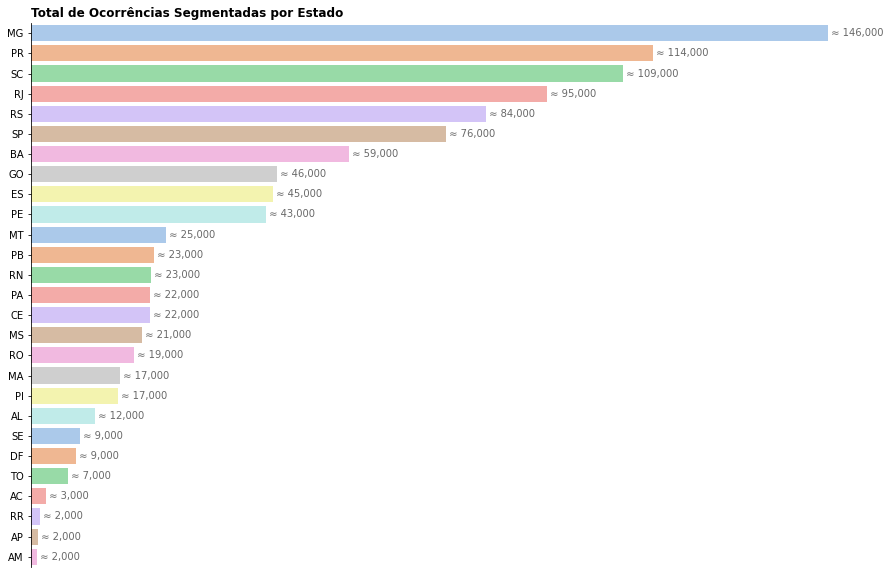

In [133]:

plt.figure(figsize = (15,10))

ax = sns.countplot(y = 'uf', data = df_ocorrencias_limpo, order = df_ocorrencias_limpo['uf'].value_counts().index, palette='pastel')

ax.set_xlabel('')
ax.set_ylabel('')


ax.set_xticks([])

plt.title('Total de Ocorrências Segmentadas por Estado', 
          fontdict={'fontsize': 12,
                    'fontweight': 'bold',
                    'verticalalignment': 'baseline'
                   },
          loc='left')

for i in ax.patches:
    ax.text(i.get_width()-1, i.get_y()+.55, \
            ' ≈ ' + f"{int(math.ceil(i.get_width() / 1000.0)) * 1000:,}", fontsize=10,
            color='dimgrey')
    
# Removendo bordas
sns.despine(bottom=True)

plt.show()

## 11. Como as ocorrências estão distribuídas por hora?

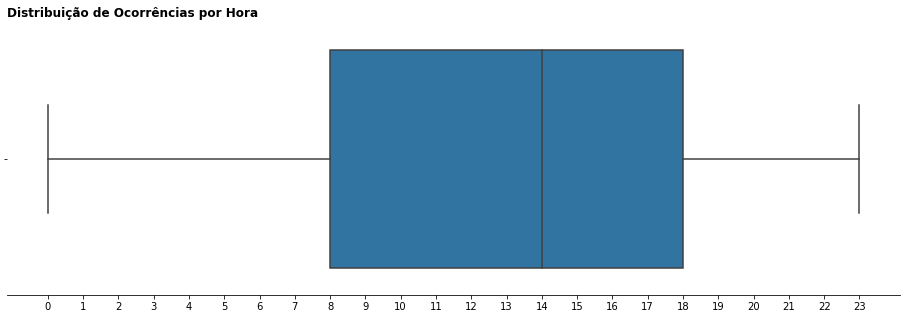

In [134]:



plt.figure(figsize = (16, 5))

ax = sns.boxplot(data=df_ocorrencias_limpo, x='hora')

ax.set_xlabel('')
ax.set_ylabel('')


ax.set_xticks(np.arange(0, 24, 1))

plt.title('Distribuição de Ocorrências por Hora', 
          fontdict={'fontsize': 12,
                    'fontweight': 'bold',
                    'verticalalignment': 'baseline'
                   },
          loc='left')

for i in ax.patches:
    ax.text(i.get_width()-1, i.get_y()+.55, \
            ' ≈ ' + f"{int(math.ceil(i.get_width() / 1000.0)) * 1000:,}", fontsize=10,
            color='dimgrey')
    
# Removendo bordas
sns.despine(left=True)

plt.show()

# Modelo de Regressão Logística

O objetivo deste modelo é classificar o tipo do solo em que a ocorrência aconteceu.

## Separando variáveis independentes e dependentes

Vou criar um backup da base antes de iniciar os tratamentos

In [135]:
df_ocorrencias_bkp = df_ocorrencias_limpo.copy() 

In [136]:
df_ocorrencias_limpo = df_ocorrencias_bkp.copy()

In [137]:
df_ocorrencias_limpo.uso_solo.unique()

['Rural', 'Urbano', 'Não Informado']
Categories (3, object): ['Rural', 'Urbano', 'Não Informado']

In [138]:
df_ocorrencias_limpo.groupby('uso_solo').agg({'id':'count'})

,id
uso_solo,
Não Informado,10
Rural,484049
Urbano,554414


A divisão de amostras está relativamente bem distribuída, sendo um total de aproximadamente 1,04 milhão de amostras dividas entre 485 mil amostras de ocorrencias em solo rural, enquanto temos por volta de 555 mil amostras de ocorrencias em solo urbano.

Vou remover todas as amostras em que o solo não foi informado

In [139]:
index_solo_nao_informado = df_ocorrencias_limpo[df_ocorrencias_limpo['uso_solo'] == 'Não Informado'].index
 
df_ocorrencias_limpo.drop(index_solo_nao_informado , inplace=True)
df_ocorrencias_limpo.uso_solo = df_ocorrencias_limpo.uso_solo.cat.remove_unused_categories()
df_ocorrencias_limpo.groupby('uso_solo').agg({'id':'count'})

,id
uso_solo,
Rural,484049
Urbano,554414


In [140]:
df_ocorrencias_limpo.uso_solo.unique()

['Rural', 'Urbano']
Categories (2, object): ['Rural', 'Urbano']

In [141]:
df_ocorrencias_informativo = df_ocorrencias_limpo.dtypes.to_frame().reset_index().rename(columns={0:'tipo'})
df_ocorrencias_informativo['exemplo'] = list(df_ocorrencias_limpo.iloc[0])
df_ocorrencias_informativo

,index,tipo,exemplo
0,id,int64,1000329
1,ano,category,2010
2,mes,category,10
3,data,datetime64[ns],2010-10-29 00:00:00
4,hora,int64,14
5,dia_semana,category,Sexta
6,uf,category,RS
7,municipio,category,santa barbara do sul
8,br,category,285
9,km,float64,397.3


Campos retirados:

|     Campos     |     Motivo    |
| :------------  | :------------ |
| **id**         | Campo apenas para organização  |
| **ano**        | Definição temporoal, não vejo ligação direto com o problema de classificação |
| **mes**        | Definição temporoal, não vejo ligação direto com o problema de classificação |
| **data**       | Definição temporoal, não vejo ligação direto com o problema de classificação |
| **hora**       | Definição temporoal, não vejo ligação direto com o problema de classificação |
| **dia_semana** | Definição temporoal, não vejo ligação direto com o problema de classificação |
| **pessoas**    | Este campo é a soma das colunas de ilesos, feridos e mortos |
| **feridos**    | Este campo é a soma das colunas feridos leves e feridos graves |


In [142]:
colunas_uteis = [
                'uf',
                'municipio',
                'br',
                'km',
                'condicao_meteorologica',
                'fase_dia',
                'sentido_via',
                'tipo_pista',
                'tracado_via',
                'tipo_acidente',
                'causa_acidente',
                'classificacao_acidente',
                'veiculos',
                'ilesos',
                'feridos_leves',
                'feridos_graves',
                'mortos',
                'ignorados'
]

df_variaveis_independentes = df_ocorrencias_limpo.copy()[colunas_uteis]
df_variaveis_independentes

,uf,municipio,br,km,condicao_meteorologica,fase_dia,sentido_via,tipo_pista,tracado_via,tipo_acidente,causa_acidente,classificacao_acidente,veiculos,ilesos,feridos_leves,feridos_graves,mortos,ignorados
0,RS,santa barbara do sul,285,397.3,Chuva,Pleno dia,Crescente,Simples,Curva,Saída de Pista,Velocidade incompatível,Sem Vítimas,1,5,0,0,0,0
1,SP,miracatu,116,406.5,Chuva,Plena noite,Crescente,Dupla,Reta,Colisão com objeto fixo,Outras,Sem Vítimas,1,1,0,0,0,0
2,BA,capim grosso,407,220.8,Chuva,Pleno dia,Decrescente,Simples,Reta,Capotamento,Velocidade incompatível,Com Vítimas Feridas,1,1,0,2,0,0
3,BA,nova itarana,116,567.0,Ceu Claro,Pleno dia,Crescente,Múltipla,Reta,Colisão com objeto fixo,Outras,Sem Vítimas,1,1,0,0,0,0
4,SE,sao cristovao,101,107.0,Ceu Claro,Pleno dia,Decrescente,Simples,Reta,Colisão com objeto fixo,Falta de atenção,Com Vítimas Feridas,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038468,SC,joinville,101,37.0,Sol,Pleno dia,Decrescente,Dupla,Reta,Queda de motocicleta / bicicleta / veículo,Falta de atenção,Com Vítimas Feridas,2,2,1,0,0,0
1038469,MT,diamantino,163,512.0,Chuva,Pleno dia,Decrescente,Simples,Reta,Colisão traseira,Não guardar distância de segurança,Sem Vítimas,2,2,0,0,0,0
1038470,DF,brasilia,80,0.5,Ceu Claro,Pleno dia,Decrescente,Simples,Reta,Colisão lateral,Falta de atenção,Com Vítimas Fatais,2,0,1,1,1,1
1038471,AL,murici,104,52.9,Nublado,Pleno dia,Crescente,Simples,Curva,Saída de Pista,Outras,Sem Vítimas,1,2,0,0,0,0


In [143]:
for coluna in df_variaveis_independentes.select_dtypes(include=['category']).columns:
    df_variaveis_independentes[coluna] = df_variaveis_independentes[coluna].astype('category').cat.codes

df_variaveis_independentes

,uf,municipio,br,km,condicao_meteorologica,fase_dia,sentido_via,tipo_pista,tracado_via,tipo_acidente,causa_acidente,classificacao_acidente,veiculos,ilesos,feridos_leves,feridos_graves,mortos,ignorados
0,22,1601,59,397.3,1,4,0,3,1,14,11,4,1,5,0,0,0,0
1,25,1148,18,406.5,1,3,0,0,3,5,9,4,1,1,0,0,0,0
2,4,403,100,220.8,1,4,1,3,3,2,11,1,1,1,0,2,0,0
3,4,1230,18,567.0,0,4,0,1,3,5,9,4,1,1,0,0,0,0
4,24,1689,15,107.0,0,4,1,3,3,5,5,1,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038468,23,971,15,37.0,8,4,1,0,3,13,5,1,2,2,1,0,0,0
1038469,12,582,29,512.0,1,4,1,3,3,9,8,4,2,2,0,0,0,0
1038470,6,269,13,0.5,0,4,1,3,3,8,5,0,2,0,1,1,1,1
1038471,1,1197,16,52.9,6,4,0,3,1,14,9,4,1,2,0,0,0,0


In [144]:
df_qtd_campos_vazios_por_coluna = pd.DataFrame({
    'coluna':[],
    'qtd_vazio':[]
})

for column in df_variaveis_independentes.columns:
    df_aux = pd.DataFrame({
        'coluna': [column],
        'qtd_vazio': [df_variaveis_independentes[column].isnull().sum()]
    })
    df_qtd_campos_vazios_por_coluna = pd.concat([df_qtd_campos_vazios_por_coluna, df_aux])

df_qtd_campos_vazios_por_coluna.reset_index().drop(columns=['index']).head()

,coluna,qtd_vazio
0,uf,0.0
1,municipio,0.0
2,br,0.0
3,km,4.0
4,condicao_meteorologica,0.0


In [145]:
df_variaveis_independentes.km = df_variaveis_independentes.km.fillna(0)

In [146]:
df_qtd_campos_vazios_por_coluna = pd.DataFrame({
    'coluna':[],
    'qtd_vazio':[]
})

for column in df_variaveis_independentes.columns:
    df_aux = pd.DataFrame({
        'coluna': [column],
        'qtd_vazio': [df_variaveis_independentes[column].isnull().sum()]
    })
    df_qtd_campos_vazios_por_coluna = pd.concat([df_qtd_campos_vazios_por_coluna, df_aux])

df_qtd_campos_vazios_por_coluna.reset_index().drop(columns=['index']).head()

,coluna,qtd_vazio
0,uf,0.0
1,municipio,0.0
2,br,0.0
3,km,0.0
4,condicao_meteorologica,0.0


In [147]:
df_variavel_dependente = df_ocorrencias_limpo.copy()[['uso_solo']]
dict_uso_solo = dict( enumerate(df_variavel_dependente['uso_solo'].cat.categories ) )
dict_uso_solo

{0: 'Rural', 1: 'Urbano'}

|Classe|valor
|:--|:--:|
|Positiva| Urbano
|Negativa| Rural

In [148]:
df_variavel_dependente['uso_solo'] = df_variavel_dependente['uso_solo'].astype('category').cat.codes
df_variavel_dependente['uso_solo'].unique()

array([0, 1], dtype=int8)

In [149]:
df_variavel_dependente

,uso_solo
0,0
1,0
2,0
3,0
4,0
...,...
1038468,1
1038469,0
1038470,0
1038471,0


DataFrames de variaveis independentes e variavel independente prontos pra separação de treino e teste.

## Separação e Normalização dos Conjuntos de Treino e Teste

In [150]:
%%time

X = df_variaveis_independentes.values
y = df_variavel_dependente.values

transformer = Normalizer().fit(X)
X_normalized = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                                        stratify = y,
                                                        test_size = 0.25,
                                                        random_state = 13)

df_informativo_separacao = pd.DataFrame({
    'grupos'  : ['X - dados','y - label'],
    'total'   : [X_normalized.shape[0], y.shape[0]],
    'treino'  : [X_train.shape[0], y_train.shape[0]],
    'teste'   : [X_test.shape[0], y_test.shape[0]],
    'colunas' : [X.shape[1], y.shape[1]]
}).set_index('grupos')

df_informativo_separacao

CPU times: user 3.1 s, sys: 70.1 ms, total: 3.17 s
Wall time: 3.17 s


,total,treino,teste,colunas
grupos,,,,
X - dados,1038463,778847,259616,18
y - label,1038463,778847,259616,1


## Criação do classificador logístico

Todos as funções de otimização disponíveis para o modelo de classificação de regressão logística serão testados

### Newton’s Method

In [151]:
%%time

classificador_newton_cg = LogisticRegression(class_weight='balanced', random_state=13, solver='newton-cg')
classificador_newton_cg.fit(X_train, y_train.ravel())

CPU times: user 59.8 s, sys: 25 s, total: 1min 24s
Wall time: 7.24 s


LogisticRegression(class_weight='balanced', random_state=13, solver='newton-cg')

In [152]:
y_pred = classificador_newton_cg.predict(X_test)
classification_report_newton_cg = classification_report(y_test, y_pred, target_names=['Rural', 'Urbano'])
print(classification_report_newton_cg)

              precision    recall  f1-score   support

       Rural       0.63      0.60      0.61    121012
      Urbano       0.66      0.68      0.67    138604

    accuracy                           0.65    259616
   macro avg       0.65      0.64      0.64    259616
weighted avg       0.65      0.65      0.65    259616



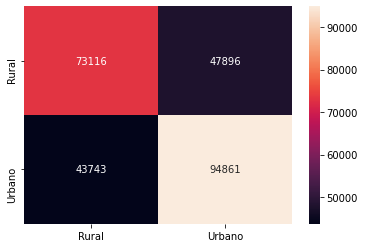

In [153]:
x = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=['Rural', 'Urbano'], yticklabels=['Rural', 'Urbano'])

### Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm

In [154]:
%%time

classificador_lbfgs = LogisticRegression(class_weight='balanced', random_state=13, solver='lbfgs')
classificador_lbfgs.fit(X_train, y_train.ravel())

CPU times: user 1min 18s, sys: 48.3 s, total: 2min 6s
Wall time: 10.7 s


/home/thpomari/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=13)

In [155]:
y_pred = classificador_lbfgs.predict(X_test)
classification_report_lbfgs = classification_report(y_test, y_pred, target_names=['Rural', 'Urbano'])
print(classification_report_lbfgs)

              precision    recall  f1-score   support

       Rural       0.62      0.61      0.62    121012
      Urbano       0.67      0.68      0.67    138604

    accuracy                           0.65    259616
   macro avg       0.65      0.64      0.64    259616
weighted avg       0.65      0.65      0.65    259616



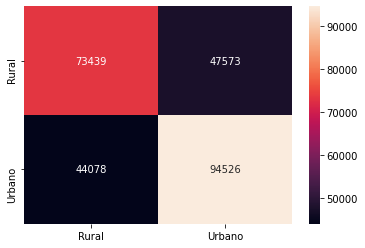

In [156]:
x = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=['Rural', 'Urbano'], yticklabels=['Rural', 'Urbano'])

###  Library for Large Linear Classification

In [157]:
%%time

classificador_liblinear = LogisticRegression(class_weight='balanced', random_state=13, solver='liblinear')
classificador_liblinear.fit(X_train, y_train.ravel())

CPU times: user 5.09 s, sys: 69.9 ms, total: 5.16 s
Wall time: 5.16 s


LogisticRegression(class_weight='balanced', random_state=13, solver='liblinear')

In [158]:
classification_report_liblinear = classification_report(y_test, y_pred, target_names=['Rural', 'Urbano'])
print(classification_report_liblinear)

              precision    recall  f1-score   support

       Rural       0.62      0.61      0.62    121012
      Urbano       0.67      0.68      0.67    138604

    accuracy                           0.65    259616
   macro avg       0.65      0.64      0.64    259616
weighted avg       0.65      0.65      0.65    259616



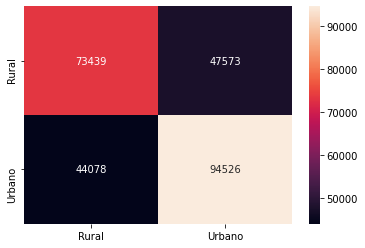

In [159]:
x = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=['Rural', 'Urbano'], yticklabels=['Rural', 'Urbano'])

### Stochastic Average Gradient

In [160]:
%%time

classificador_sag = LogisticRegression(class_weight='balanced', random_state=13, solver='sag')
classificador_sag.fit(X_train, y_train.ravel())

CPU times: user 8.78 s, sys: 0 ns, total: 8.78 s
Wall time: 8.78 s


LogisticRegression(class_weight='balanced', random_state=13, solver='sag')

In [161]:
y_pred = classificador_sag.predict(X_test)
classification_report_sag = classification_report(y_test, y_pred, target_names=['Rural', 'Urbano'])
print(classification_report_sag)

              precision    recall  f1-score   support

       Rural       0.63      0.60      0.61    121012
      Urbano       0.66      0.69      0.67    138604

    accuracy                           0.65    259616
   macro avg       0.64      0.64      0.64    259616
weighted avg       0.65      0.65      0.65    259616



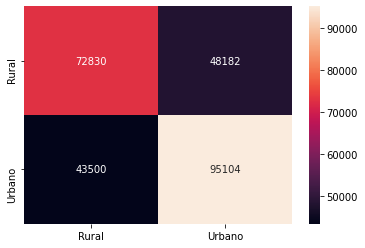

In [162]:
x = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=['Rural', 'Urbano'], yticklabels=['Rural', 'Urbano'])

### SAGA

In [163]:
%%time

classificador_saga = LogisticRegression(class_weight='balanced', random_state=13, solver='saga')
classificador_saga.fit(X_train, y_train.ravel())

CPU times: user 7.89 s, sys: 0 ns, total: 7.89 s
Wall time: 7.89 s


LogisticRegression(class_weight='balanced', random_state=13, solver='saga')

In [164]:
y_pred = classificador_saga.predict(X_test)
classification_report_saga = classification_report(y_test, y_pred, target_names=['Rural', 'Urbano'])
print(classification_report_saga)

              precision    recall  f1-score   support

       Rural       0.62      0.61      0.62    121012
      Urbano       0.67      0.68      0.67    138604

    accuracy                           0.65    259616
   macro avg       0.65      0.64      0.64    259616
weighted avg       0.65      0.65      0.65    259616



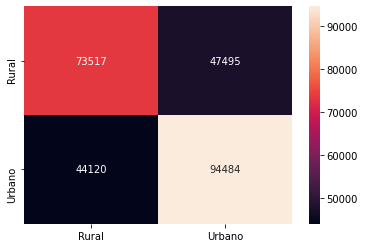

In [165]:
x = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=['Rural', 'Urbano'], yticklabels=['Rural', 'Urbano'])